18895524 Диспенсер для моющего средства

In [1]:
! pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import copy
from copy import deepcopy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


------------

In [3]:
data = pd.read_csv('/content/18895524(17.03.2022-17.06.2022).csv', sep=';')

In [4]:
data

,Дата,Продажи,Остаток,Цена,Со скидкой и промо,Скидка,Цена со скидкой,Промокод,СПП,Цена с СПП,Сумма продаж,Комментариев,Рейтинг
0,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-17,4,219.0,2131.0,404.0,81.0,404.0,0.0,0.0,404.0,1616,197.0,5.0
2,2022-06-16,2,222.0,2131.0,404.0,81.0,404.0,0.0,0.0,404.0,808,197.0,5.0
3,2022-06-15,3,224.0,2131.0,404.0,81.0,404.0,0.0,0.0,404.0,1212,197.0,5.0
4,2022-06-14,1,227.0,2131.0,404.0,81.0,404.0,0.0,0.0,404.0,404,197.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Среднее (в день),4 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 508,56 ₽",NaN,NaN
96,Дней с наличием,89 дней,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Среднее при наличии,4 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 515,89 ₽",NaN,NaN
98,Потенциал,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"146 602,00 ₽",NaN,NaN


Возьмем данные за период с 18.03.2022 по 15.06.2022. 

In [5]:
data = data[3:93]

In [6]:
data = data.sort_values(by='Дата').reset_index(drop=True) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Дата                90 non-null     object 
 1   Продажи             90 non-null     object 
 2   Остаток             90 non-null     float64
 3   Цена                90 non-null     float64
 4   Со скидкой и промо  90 non-null     float64
 5   Скидка              90 non-null     float64
 6   Цена со скидкой     90 non-null     float64
 7   Промокод            90 non-null     float64
 8   СПП                 90 non-null     float64
 9   Цена с СПП          90 non-null     float64
 10  Сумма продаж        90 non-null     object 
 11  Комментариев        90 non-null     float64
 12  Рейтинг             90 non-null     float64
dtypes: float64(10), object(3)
memory usage: 9.3+ KB


In [8]:
data['Дата'] = pd.to_datetime(data['Дата'], format='%Y-%m-%d')

In [9]:
data['Продажи'] = data['Продажи'].astype('int')
data['Сумма продаж'] = data['Сумма продаж'].astype('float64')

In [10]:
data = data[['Дата', 'Продажи', 'Остаток', 'Цена', 'Со скидкой и промо', 'Скидка', 'Сумма продаж',
       'Комментариев', 'Рейтинг']]

In [11]:
data.columns = ['Дата', 'Продажи', 'Остаток', 'Цена', 'Цена_со_скидкой', 'Скидка',
       'Сумма_продаж', 'Комментариев', 'Рейтинг']

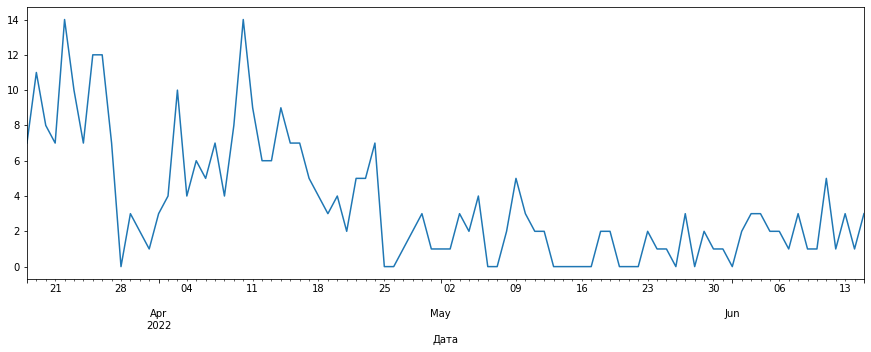

In [12]:
data.set_index('Дата')['Продажи'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [13]:
decomposed = seasonal_decompose(data.set_index('Дата')['Продажи'])

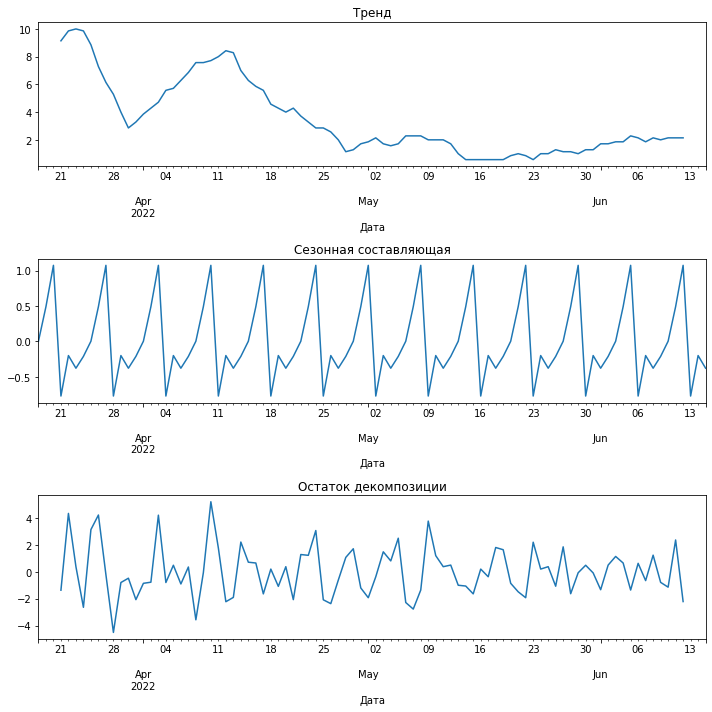

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

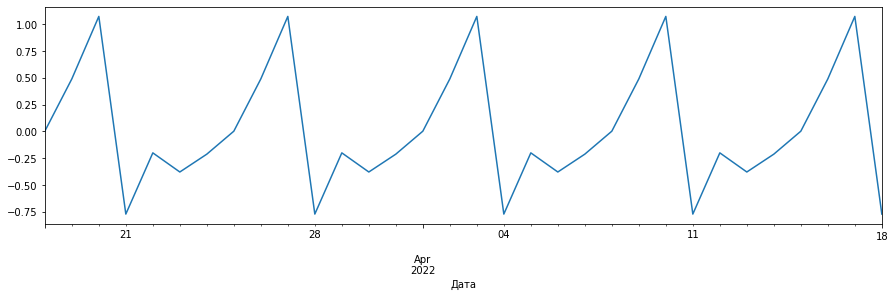

In [15]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем снижение продаж и еженедельные закономерности в изменении количества заказов. 

---------

In [16]:
data_analogi = pd.read_csv('/content/P18895524(18.03.2022 - 17.06.2022).csv', sep=';')

In [17]:
data_analogi

,Дата,Товаров,Товаров с продажами,Продаж,Выручка,Средняя цена,Ср. цена продажи,Комментарии,Рейтинг
0,2022-06-17,498.0,210.0,1605,790403,"775,7931726907631","492,46292834890966","88,15","4,569565217391304"
1,2022-06-16,468.0,208.0,1601,777016,"780,2264957264957","485,3316677076827","92,54482758620689","4,563218390804598"
2,2022-06-15,498.0,217.0,1668,862602,"780,062248995984","517,1474820143885","87,7292576419214","4,574235807860262"
3,2022-06-14,498.0,210.0,1671,848419,"779,5863453815261","507,7312986235787","87,3406113537118","4,5873362445414845"
4,2022-06-13,498.0,222.0,1649,810732,"777,2831325301205","491,650697392359","86,96069868995633","4,591703056768559"
...,...,...,...,...,...,...,...,...,...
88,2022-03-21,298.0,116.0,893,575419,"1120,8187919463087","644,3661814109743","94,26254826254826","4,525096525096525"
89,2022-03-20,296.0,126.0,977,662228,"1109,7533783783783","677,8178096212897","94,26254826254826","4,525096525096525"
90,2022-03-19,296.0,132.0,1086,710766,"1113,277027027027","654,4806629834254","94,26254826254826","4,525096525096525"
91,2022-03-18,223.0,112.0,923,616015,"1124,5964125560538","667,4052004333695","110,09677419354838","4,525345622119816"


In [18]:
data_analogi = data_analogi[2:92]

In [19]:
data_analogi = data_analogi.sort_values(by='Дата').reset_index(drop=True) 

In [20]:
data_analogi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Дата                 90 non-null     object 
 1   Товаров              90 non-null     float64
 2   Товаров с продажами  90 non-null     float64
 3   Продаж               90 non-null     int64  
 4   Выручка              90 non-null     int64  
 5   Средняя цена         90 non-null     object 
 6   Ср. цена продажи     90 non-null     object 
 7   Комментарии          90 non-null     object 
 8   Рейтинг              90 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.5+ KB


In [21]:
data_analogi['Дата'] = pd.to_datetime(data_analogi['Дата'], format='%Y-%m-%d')

In [22]:
data_analogi['Средняя цена'] = data_analogi['Средняя цена'].apply(lambda x: x.replace(',','.'))
data_analogi['Ср. цена продажи'] = data_analogi['Ср. цена продажи'].apply(lambda x: x.replace(',','.'))
data_analogi['Комментарии'] = data_analogi['Комментарии'].apply(lambda x: x.replace(',','.'))
data_analogi['Рейтинг'] = data_analogi['Рейтинг'].apply(lambda x: x.replace(',','.'))

In [23]:
data_analogi['Средняя цена'] = round(data_analogi['Средняя цена'].astype('float64'),2)
data_analogi['Ср. цена продажи'] = round(data_analogi['Ср. цена продажи'].astype('float64'),2)
data_analogi['Комментарии'] = round(data_analogi['Комментарии'].astype('float64'),2)
data_analogi['Рейтинг'] = round(data_analogi['Рейтинг'].astype('float64'),2)

In [24]:
data_analogi.columns = ['Дата', 'Товаров_аналог', 'Товаров_аналог_с_продажами', 'Продаж_аналогичных', 'Выручка',
       'Средняя_цена_аналог', 'Средняя_цена_продажи_аналог', 'Комментарии_аналог', 'Рейтинг_аналог']

In [25]:
#data_itog = data.merge(data_analogi, left_on='Дата', right_on='Дата')

In [26]:
#data_itog

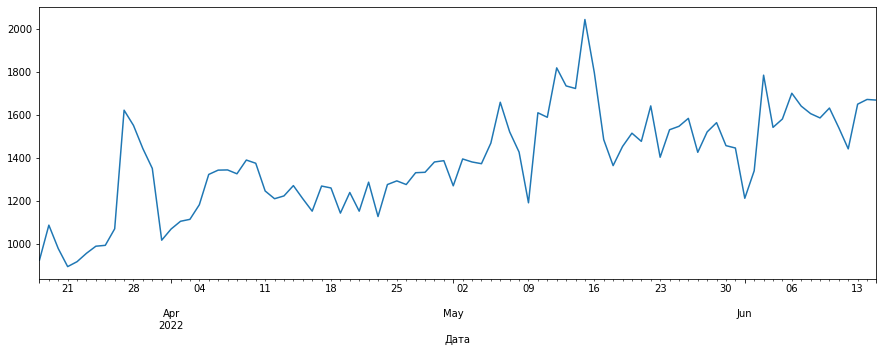

In [27]:
data_analogi.set_index('Дата')['Продаж_аналогичных'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [28]:
decomposed = seasonal_decompose(data_analogi.set_index('Дата')['Продаж_аналогичных'])

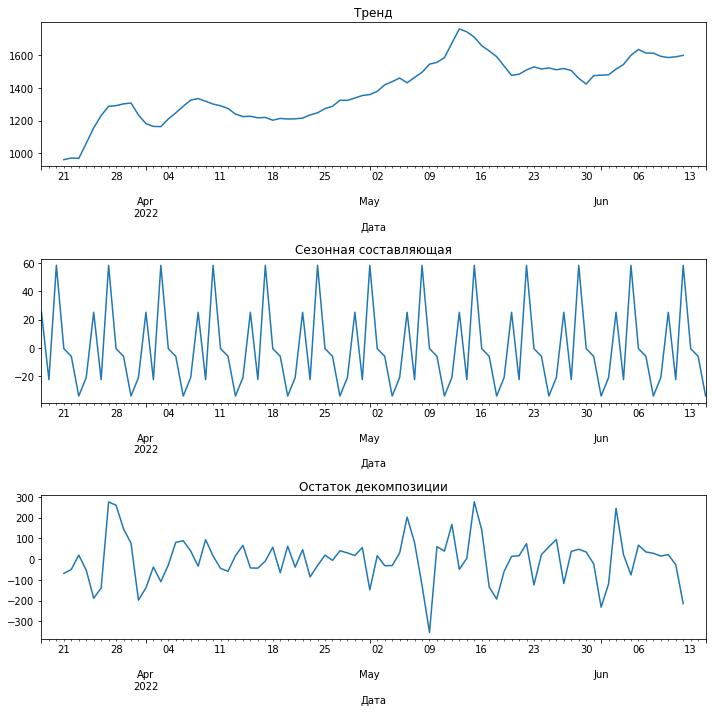

In [29]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

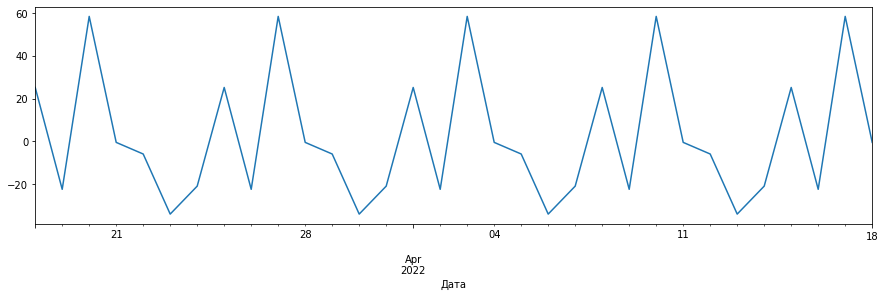

In [30]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем рост продаж аналогичных товаров и еженедельные закономерности в изменении количества заказов. 

------

-----------

Для построения модели прогнозирования продаж предварительно построим следующие прогнозы:

- предскажем среднюю цену продажи по аналогичным товарам.

- предскажем количество проданных аналогичных товаров.

----------

-----------

Предскажем среднюю цену продажи по аналогичным товарам.

In [31]:
data_analog_propnet = deepcopy(data_analogi[['Дата','Средняя_цена_продажи_аналог']])

In [32]:
data_analog_propnet

,Дата,Средняя_цена_продажи_аналог
0,2022-03-18,667.41
1,2022-03-19,654.48
2,2022-03-20,677.82
3,2022-03-21,644.37
4,2022-03-22,692.87
...,...,...
85,2022-06-11,491.69
86,2022-06-12,509.73
87,2022-06-13,491.65
88,2022-06-14,507.73


In [33]:
data_analog_propnet.columns = ['ds', 'y']

In [34]:
m_analog = Prophet()
m_analog.fit(data_analog_propnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future_analog = m_analog.make_future_dataframe(periods=30)
future_analog.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [36]:
forecast_analog = m_analog.predict(future_analog)
forecast_analog[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,507.712376
91,2022-06-17,493.813385
92,2022-06-18,514.639213
93,2022-06-19,502.502495
94,2022-06-20,504.635696
95,2022-06-21,502.170814
96,2022-06-22,503.376763
97,2022-06-23,499.694772
98,2022-06-24,485.795781
99,2022-06-25,506.621609


------------

---------------

Предскажем количество проданных аналогичных товаров.

In [37]:
data_analog_prod = deepcopy(data_analogi[['Дата','Продаж_аналогичных']])

In [38]:
data_analog_prod

,Дата,Продаж_аналогичных
0,2022-03-18,923
1,2022-03-19,1086
2,2022-03-20,977
3,2022-03-21,893
4,2022-03-22,916
...,...,...
85,2022-06-11,1539
86,2022-06-12,1441
87,2022-06-13,1649
88,2022-06-14,1671


In [39]:
data_analog_prod.columns = ['ds', 'y']

In [40]:
m_analog_prod = Prophet()
m_analog_prod.fit(data_analog_prod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future_analog_prod = m_analog_prod.make_future_dataframe(periods=30)
future_analog_prod.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [42]:
forecast_analog_prod = m_analog_prod.predict(future_analog_prod)
forecast_analog_prod[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,1658.496100
91,2022-06-17,1698.433108
92,2022-06-18,1675.323679
93,2022-06-19,1749.250128
94,2022-06-20,1704.306824
95,2022-06-21,1708.726456
96,2022-06-22,1687.542451
97,2022-06-23,1703.914764
98,2022-06-24,1743.851771
99,2022-06-25,1720.742343


-----------

------

Предскажем продажи на 30 дней вперед (для прогноза предоставлен слишком маленький период исторических данных).

Среднюю цену и количество продаж аналогичных товаров мы предсаказали выше. 

Зафиксируем нашу цену на продажу товара на уровне 2022-06-15. 

Также в модель добавим признак "день недели", так как наблюдается еженедельная зависимость.

В связи с небольшим объемом выборки ограничимся этими признаками.

При увеличении объема исторических данных имеет смысл ввести признаки "праздничный день", "день", "месяц", "год", "предыдущее значение", "скользящее среднее" и др.

In [43]:
data_profnet = deepcopy(data[['Дата','Продажи']])

In [44]:
data_profnet

,Дата,Продажи
0,2022-03-18,7
1,2022-03-19,11
2,2022-03-20,8
3,2022-03-21,7
4,2022-03-22,14
...,...,...
85,2022-06-11,5
86,2022-06-12,1
87,2022-06-13,3
88,2022-06-14,1


In [45]:
data_profnet.columns = ['ds', 'y']

In [46]:
def avg_price_analog(ds): # Средняя_цена_продажи_аналог
     
    if data_profnet.loc[data_profnet['ds'] == ds]['avg_price'].empty:
        return forecast_analog.loc[forecast_analog['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Средняя_цена_продажи_аналог']).values[0]
   
    return 0

In [47]:
def prod_analog(ds): # Продаж_аналогичных
     
    if data_profnet.loc[data_profnet['ds'] == ds]['prod'].empty:
        return forecast_analog_prod.loc[forecast_analog_prod['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Продаж_аналогичных']).values[0]
   
    return 0

In [48]:
def price_future(ds): # фиксируем цену на месяц 
     
    if data_profnet.loc[data_profnet['ds'] == ds]['price'].empty:
        return 404
    else:
        return (data.loc[data_analogi['Дата'] == ds]['Цена_со_скидкой']).values[0]
   
    return 0

In [49]:
m = Prophet()

In [50]:
m.add_regressor('avg_price')

In [51]:
m.add_regressor('prod')

In [52]:
m.add_regressor('price')

In [53]:
m.add_regressor('day_of_week')

In [54]:
data_profnet['avg_price'] = deepcopy(data_analogi['Средняя_цена_продажи_аналог'])

In [55]:
data_profnet['prod'] = deepcopy(data_analogi['Продаж_аналогичных'])

In [56]:
data_profnet['price'] = deepcopy(data['Цена_со_скидкой'])

In [57]:
data_profnet['day_of_week'] = data_profnet['ds'].dt.dayofweek

In [58]:
m.fit(data_profnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = m.make_future_dataframe(periods=30)

In [60]:
future['avg_price'] = future['ds'].apply(avg_price_analog)

In [61]:
future['prod'] = future['ds'].apply(prod_analog)

In [62]:
future['price'] = future['ds'].apply(price_future)

In [63]:
future['day_of_week'] = future['ds'].dt.dayofweek

In [64]:
forecast = m.predict(future)

In [65]:
forecast.loc[(forecast.yhat<0),'yhat'] = 0 

In [66]:
forecast['round_yhat'] = round(forecast['yhat'])

In [67]:
forecast[['ds', 'round_yhat']].tail(30)

,ds,round_yhat
90,2022-06-16,1.0
91,2022-06-17,2.0
92,2022-06-18,2.0
93,2022-06-19,2.0
94,2022-06-20,1.0
95,2022-06-21,1.0
96,2022-06-22,1.0
97,2022-06-23,1.0
98,2022-06-24,1.0
99,2022-06-25,2.0


Реальные продажи:

2022-06-19	4

2022-06-18	3

2022-06-17	4

2022-06-16	2

Считаю, что для анализа и прогнозирования с помощью примененной модели Prophnet недостаточно данных.